In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [7]:
x_train[0].shape

(28, 28)

In [ ]:
c# Defining the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.3302 - accuracy: 0.8940 - val_loss: 0.1199 - val_accuracy: 0.9631
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1069 - accuracy: 0.9677 - val_loss: 0.0829 - val_accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0731 - accuracy: 0.9783 - val_loss: 0.0645 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0571 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0509 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0470 - val_accura

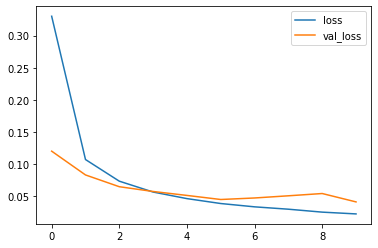

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

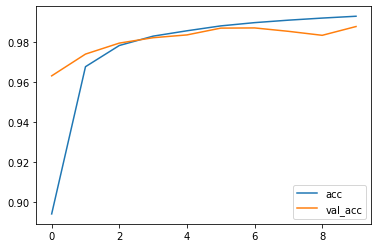

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,y_pred)
print("               Predicted Label")
print(cm)

               Predicted Label
[[ 976    0    0    0    0    0    1    2    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1027    1    1    0    0    2    1    0]
 [   0    0    3  997    1    4    0    2    2    1]
 [   1    0    2    0  966    0    2    1    1    9]
 [   1    1    0    2    0  885    0    1    1    1]
 [   4    5    2    1    2    5  938    0    1    0]
 [   0    8    9    0   10    2    0  997    0    2]
 [   1    0    1    2    0    2    0    1  967    0]
 [   2    0    1    1    4    1    0    5    5  990]]


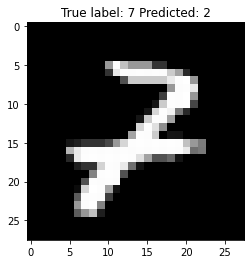

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));